In [1]:
import geopandas as gpd
import geocoder
import json
import pandas as pd
from shapely.geometry import LineString, Point, Polygon

from src.func import Preload

# Read data

In [2]:
long_term_care = pd.read_csv('Datasets/Raw/身障社區長照機構_2023-06-11.csv', encoding='big5')
village_border = gpd.read_file('Datasets/Raw/臺北市區界圖_20220915', encoding='utf-8')

# Point

In [3]:
long_term_care

,機構類型,機構名稱,地址,電話
0,身障社區長照機構(日間照顧),士林失能身障日照中心,臺北市士林區後港街189號一樓,(02)28810272
1,身障社區長照機構(日間照顧),臺北市中山身障社區式長照機構（日間照顧）,臺北市中山區長安西路5弄2號四樓,(02)25211032
2,身障社區長照機構(日間照顧),臺北市民生身障社區式長照機構（日間照顧）,臺北市松山區民生東路五段163之1號七樓,(02)27609605
3,身障社區長照機構(日間照顧),臺北市信義身障社區式長照機構（日間照顧）,臺北市信義區信義路五段15號五樓,(02)27229933


In [4]:
addr_0 = long_term_care.loc[0, '地址']
addr_0_info = geocoder.arcgis(addr_0)
addr_0_info.json

{'address': '台北市士林區前港里後港街189號, 11159',
 'bbox': {'northeast': [25.089019988075, 121.521929970555],
  'southwest': [25.087019988075, 121.519929970555]},
 'confidence': 9,
 'lat': 25.088019988074905,
 'lng': 121.52092997055541,
 'ok': True,
 'quality': 'PointAddress',
 'raw': {'name': '台北市士林區前港里後港街189號, 11159',
  'extent': {'xmin': 121.519929970555,
   'ymin': 25.087019988075,
   'xmax': 121.521929970555,
   'ymax': 25.089019988075},
  'feature': {'geometry': {'x': 121.52092997055541, 'y': 25.088019988074905},
   'attributes': {'Score': 98.67, 'Addr_Type': 'PointAddress'}}},
 'score': 98.67,
 'status': 'OK'}

In [5]:
# get lat and lng of addr_0
addr_0_lat = addr_0_info.json['lat']
addr_0_lng = addr_0_info.json['lng']

In [6]:
# get lat and lng of addr_1
addr_1 = long_term_care.loc[1, '地址']
addr_1_info = geocoder.arcgis(addr_1)
addr_1_lat = addr_1_info.json['lat']
addr_1_lng = addr_1_info.json['lng']

In [7]:
# transfer string to Point
point0 = Point(addr_0_lat, addr_0_lng)
point1 = Point(addr_1_lat, addr_1_lng)
print(type(point0))
print(type(point1))

<class 'shapely.geometry.point.Point'>
<class 'shapely.geometry.point.Point'>


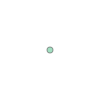

In [8]:
point0

In [9]:
# get distance
print(point0.distance(point1))
print(point0.distance(point0))
print(point1.distance(point1))

0.03808041718070139
0.0
0.0


# LineString

In [10]:
first_line_string = LineString([point0, point1])

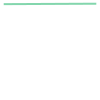

In [11]:
first_line_string

In [12]:
# get length
first_line_string.length

0.03808041718070139

# Polygon

In [13]:
# get lat and lng of addr_2
addr_2 = long_term_care.loc[2, '地址']
addr_2_info = geocoder.arcgis(addr_2)
addr_2_lat = addr_2_info.json['lat']
addr_2_lng = addr_2_info.json['lng']
point2 = Point(addr_2_lat, addr_2_lng)

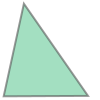

In [14]:
first_polygon = Polygon((point0, point1, point2))
first_polygon

In [15]:
village_border.head(3)

,AREA,PERF_ID,COUN_ID,CPID,CPTID,NPID,NPTID,PNAME,TNAME,PTNAME,TM2_MAX_X,TM2_MAX_Y,TM2_MIN_X,TM2_MIN_Y,MAX_X,MAX_Y,MIN_X,MIN_Y,geometry
0,5.738380e+07,63012.0,6301200,63012,6301200,63012.0,6301200.0,臺北市,北投區,臺北市北投區,307802.1700,2.789176e+06,296266.0530,2.776476e+06,121.57361,25.21014,121.45871,25.09588,"POLYGON ((302675.668 2785251.546, 302675.502 2..."
1,6.110781e+07,63011.0,6301100,63011,6301100,63011.0,6301100.0,臺北市,士林區,臺北市士林區,311328.6318,2.787546e+06,296551.1512,2.774091e+06,121.60853,25.19528,121.46145,25.07434,"POLYGON ((307802.170 2787372.760, 307831.907 2..."
2,3.195183e+07,63010.0,6301000,63010,6301000,63010.0,6301000.0,臺北市,內湖區,臺北市內湖區,313380.3449,2.778643e+06,305676.8954,2.771635e+06,121.62848,25.11483,121.55181,25.05186,"POLYGON ((310064.640 2778552.346, 310063.746 2..."


In [16]:
xinyi_idx = village_border.index[village_border['TNAME'] == '信義區'].tolist()[0]
xinyi_coordinate = str(village_border.loc[xinyi_idx, 'geometry'])
xinyi_coordinate[:500]

'POLYGON ((308517.3815307617 2771386.1458740234, 308517.86169433594 2771381.5908813477, 308529.1846923828 2771381.8369140625, 308532.48907470703 2771313.1583251953, 308532.49548339844 2771313.0228881836, 308534.4144897461 2771275.6220703125, 308535.21228027344 2771266.5020751953, 308536.5745239258 2771250.928100586, 308539.21350097656 2771230.5502929688, 308542.3314819336 2771216.645324707, 308549.0494995117 2771203.938293457, 308569.5999145508 2771178.8884887695, 308570.8812866211 2771177.326293'

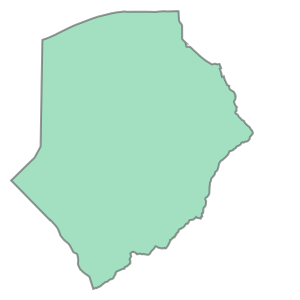

In [17]:
village_border.loc[xinyi_idx, 'geometry']

#  crs

In [18]:
type(village_border)

geopandas.geodataframe.GeoDataFrame

In [19]:
village_border = village_border[['PTNAME', 'geometry']]
village_border.head(3)

,PTNAME,geometry
0,臺北市北投區,"POLYGON ((302675.668 2785251.546, 302675.502 2..."
1,臺北市士林區,"POLYGON ((307802.170 2787372.760, 307831.907 2..."
2,臺北市內湖區,"POLYGON ((310064.640 2778552.346, 310063.746 2..."


In [20]:
village_border.crs = 'EPSG:3826'
village_border.crs

<Projected CRS: EPSG:3826>
Name: TWD97 / TM2 zone 121
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Taiwan, Republic of China - between 120°E and 122°E, onshore and offshore - Taiwan Island.
- bounds: (119.99, 20.41, 122.06, 26.72)
Coordinate Operation:
- name: Taiwan 2-degree TM zone 121
- method: Transverse Mercator
Datum: Taiwan Datum 1997
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
village_border = village_border.to_crs('EPSG:4326')
village_border.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
village_border.head(3)

,PTNAME,geometry
0,臺北市北投區,"POLYGON ((121.52259 25.17489, 121.52259 25.174..."
1,臺北市士林區,"POLYGON ((121.57354 25.19386, 121.57383 25.194..."
2,臺北市內湖區,"POLYGON ((121.59560 25.11414, 121.59559 25.114..."


In [23]:
long_term_care

,機構類型,機構名稱,地址,電話
0,身障社區長照機構(日間照顧),士林失能身障日照中心,臺北市士林區後港街189號一樓,(02)28810272
1,身障社區長照機構(日間照顧),臺北市中山身障社區式長照機構（日間照顧）,臺北市中山區長安西路5弄2號四樓,(02)25211032
2,身障社區長照機構(日間照顧),臺北市民生身障社區式長照機構（日間照顧）,臺北市松山區民生東路五段163之1號七樓,(02)27609605
3,身障社區長照機構(日間照顧),臺北市信義身障社區式長照機構（日間照顧）,臺北市信義區信義路五段15號五樓,(02)27229933


In [24]:
# set column 'geometry'
long_term_care['geometry'] = long_term_care['地址'].apply(
    lambda x: Point(
        geocoder.arcgis(x).json['lng'],
        geocoder.arcgis(x).json['lat']
    )
)

# from pd to gpd
long_term_care = gpd.GeoDataFrame(
    long_term_care,
    crs='EPSG:4326'
)

# change crs
long_term_care = long_term_care.to_crs('EPSG:3826')

In [25]:
# get distance
long_term_care.loc[0, 'geometry'].distance(
    long_term_care.loc[1, 'geometry']
)

4218.0307886983055

# Buffer

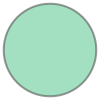

In [26]:
point0.buffer(1)

In [27]:
point0.buffer(1).area

3.136548490545938

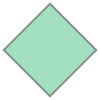

In [28]:
point0.buffer(1, resolution=1)

In [29]:
point0.buffer(1, resolution=1).area

2.0

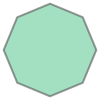

In [30]:
point0.buffer(1, resolution=2)

In [31]:
res_list = [10** x for x in range(8)]
for res in res_list:
    print(point0.buffer(1, resolution=res).area)

2.0
3.12868930080462
3.1414634623641353
3.141591361661758
3.141592640670519
3.1415926534606804
3.1415926535887913
3.141592653588855


# Intersect

In [32]:
# get buffer
long_term_care['buffer'] = long_term_care['geometry'].buffer(1000)
buffer0 = long_term_care.loc[0, 'buffer']

In [33]:
# change crs
village_border = village_border.to_crs(3826)

In [34]:
# get the districts that intersect with buffer0
idx = buffer0.intersects(village_border['geometry'])
print(idx)
print('- '* 20)
print(village_border[idx].PTNAME.tolist())

0     False
1      True
2     False
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: geometry, dtype: bool
- - - - - - - - - - - - - - - - - - - - 
['臺北市士林區', '臺北市中山區', '臺北市大同區']


# Overlay

In [35]:
polys1 = gpd.GeoSeries(
    [
        Polygon([(0,0), (2,0), (2,2), (0,2)]),
        Polygon([(2,2), (4,2), (4,4), (2,4)])
    ]
)


polys2 = gpd.GeoSeries(
    [
        Polygon([(1,1), (3,1), (3,3), (1,3)]),
        Polygon([(3,3), (5,3), (5,5), (3,5)])
    ]
)


df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

<Axes: >

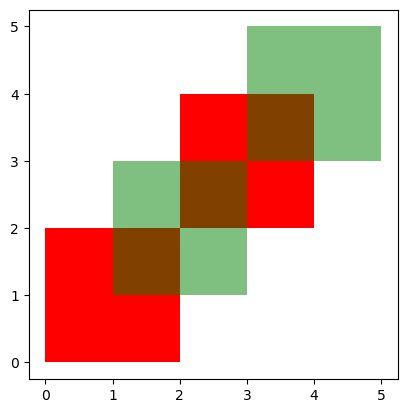

In [36]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5)

In [37]:
# how='union'
res_union = df1.overlay(df2, how='union')
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
5,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
6,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


In [38]:
res_union.explode().reset_index()

/var/folders/f_/jlrntldn06g41fwxs9z9fbjh0000gn/T/ipykernel_10017/1109923995.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  res_union.explode().reset_index()


,level_0,level_1,df1,df2,geometry
0,0,0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,1,0,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,0,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,3,0,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,4,0,2.0,NaN,"POLYGON ((3.00000 3.00000, 4.00000 3.00000, 4...."
5,4,1,2.0,NaN,"POLYGON ((3.00000 3.00000, 2.00000 3.00000, 2...."
6,5,0,NaN,1.0,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3...."
7,5,1,NaN,1.0,"POLYGON ((2.00000 2.00000, 1.00000 2.00000, 1...."
8,6,0,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


<Axes: >

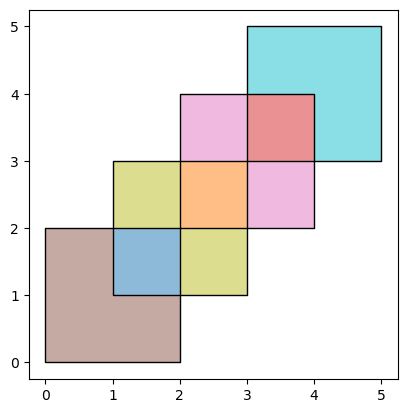

In [39]:
ax = res_union.plot(alpha=0.5, cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

In [40]:
# how='intersection'
res_intersection = df1.overlay(df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."


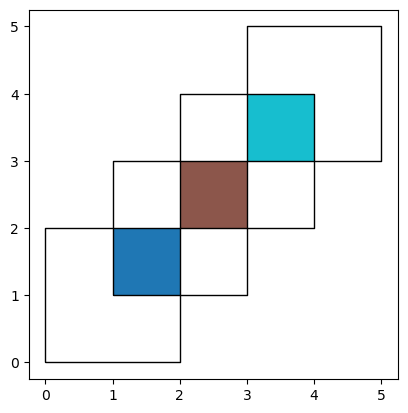

In [41]:
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');


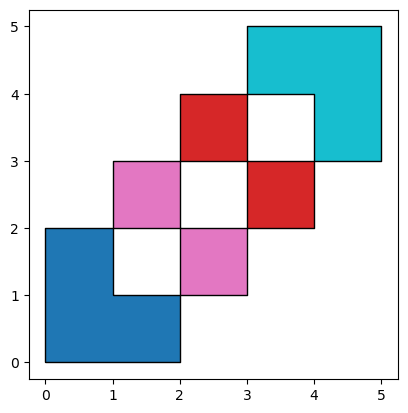

In [42]:
'''
how='symmetric_difference'
the opposite of 'intersection'
'''
res_symdiff = df1.overlay(df2, how='symmetric_difference')
ax = res_symdiff.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

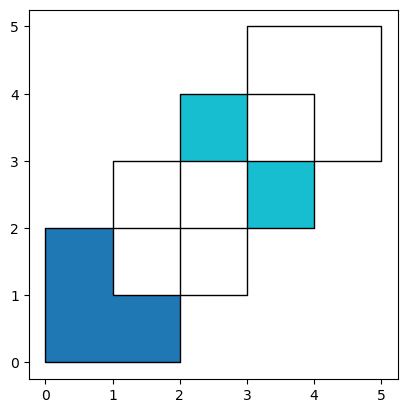

In [43]:
'''
how='difference'
obtain the geometries that are part of df1 but are not contained in df2
'''
res_difference = df1.overlay(df2, how='difference')
ax = res_difference.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

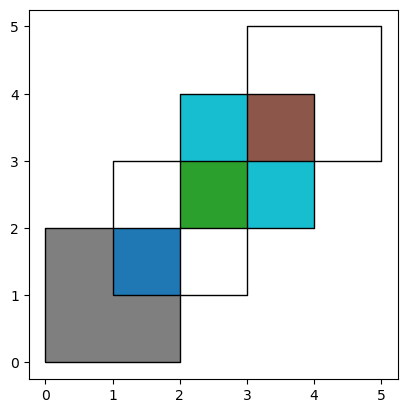

In [44]:
'''
how='identity'
the result consists of the surface of df1, 
but with the geometries obtained from overlaying df1 with df2
'''
res_identity = df1.overlay(df2, how='identity')
ax = res_identity.plot(cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');


In [45]:
long_term_care_buffer = long_term_care[['機構名稱', 'buffer']]
long_term_care_buffer = long_term_care_buffer.set_geometry('buffer')

overlay_df = gpd.overlay(
    long_term_care_buffer, 
    village_border, 
    how='union'
).explode().reset_index()

overlay_df

/var/folders/f_/jlrntldn06g41fwxs9z9fbjh0000gn/T/ipykernel_10017/398861598.py:8: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  ).explode().reset_index()


,level_0,level_1,機構名稱,PTNAME,geometry
0,0,0,士林失能身障日照中心,臺北市士林區,"POLYGON ((303540.798 2775530.143, 303526.398 2..."
1,1,0,士林失能身障日照中心,臺北市中山區,"POLYGON ((303469.493 2775245.477, 303427.534 2..."
2,2,0,臺北市中山身障社區式長照機構（日間照顧）,臺北市中山區,"POLYGON ((303538.889 2771312.112, 303524.490 2..."
3,3,0,士林失能身障日照中心,臺北市大同區,"POLYGON ((302074.216 2774746.239, 302059.273 2..."
4,4,0,臺北市中山身障社區式長照機構（日間照顧）,臺北市大同區,"POLYGON ((301548.520 2771312.112, 301543.704 2..."
5,5,0,臺北市中山身障社區式長照機構（日間照顧）,臺北市中正區,"POLYGON ((303425.626 2770938.733, 303375.174 2..."
6,6,0,臺北市民生身障社區式長照機構（日間照顧）,臺北市內湖區,"POLYGON ((307755.419 2772339.196, 307741.020 2..."
7,7,0,臺北市民生身障社區式長照機構（日間照顧）,臺北市松山區,"POLYGON ((307642.156 2771965.816, 307591.704 2..."
8,8,0,臺北市信義身障社區式長照機構（日間照顧）,臺北市信義區,"POLYGON ((308203.315 2769469.958, 308188.915 2..."
9,9,0,臺北市信義身障社區式長照機構（日間照顧）,臺北市大安區,"POLYGON ((306227.345 2769372.884, 306212.945 2..."


In [46]:
overlay_df['geometry'].area

0     3.044400e+06
1     9.154184e+04
2     1.098532e+06
3     6.069314e+02
4     8.642152e+05
5     1.173800e+06
6     1.378886e+05
7     2.998660e+06
8     3.117763e+06
9     1.878498e+04
10    3.580674e-10
11    2.728973e-09
12    9.589520e-06
13    2.968405e-01
14    9.100278e-03
15    1.314581e-01
16    3.656399e-01
17    1.290126e-03
18    5.995269e-04
19    1.747772e-04
20    1.852653e-06
21    3.297013e-05
22    9.954847e-03
23    6.510426e-03
24    4.390402e-04
25    4.906428e-03
26    5.024801e-03
27    1.686159e-04
28    5.738380e+07
29    5.789722e+07
30    1.661904e+05
31    3.181394e+07
32    1.268632e+07
33    3.906514e+06
34    5.682794e+06
35    2.195662e+07
36    6.368075e+06
37    8.121732e+06
38    7.449655e+06
39    1.132080e+07
40    3.125012e+07
dtype: float64

In [47]:
long_term_care_buffer

,機構名稱,buffer
0,士林失能身障日照中心,"POLYGON ((303545.613 2775628.160, 303540.798 2..."
1,臺北市中山身障社區式長照機構（日間照顧）,"POLYGON ((303543.704 2771410.130, 303538.889 2..."
2,臺北市民生身障社區式長照機構（日間照顧）,"POLYGON ((307760.234 2772437.213, 307755.419 2..."
3,臺北市信義身障社區式長照機構（日間照顧）,"POLYGON ((308208.130 2769567.975, 308203.315 2..."


In [48]:
from keplergl import KeplerGl

long_term_care_buffer.columns = ['機構名稱', 'geometry']
long_term_care_buffer = long_term_care_buffer.set_geometry('geometry')
long_term_care_buffer = long_term_care_buffer.to_crs('EPSG:3826')

map_ = KeplerGl(height=700)
map_.add_data(data=long_term_care_buffer, name='LTC')


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [49]:
map_

KeplerGl(data={'LTC': {'index': [0, 1, 2, 3], 'columns': ['機構名稱', 'geometry'], 'data': [['士林失能身障日照中心', 'POLYGO…

# Output

## save as GeoJson

In [50]:
long_term_care_buffer.to_file(
    'Processed_by_ETL/map_data/long_term_care_buffer.geojson', 
    driver='GeoJSON'
)

# save as json

### Two-Dimensional Data

In [51]:
TP_daycare_town = gpd.read_file('Datasets/Processed/TP_daycare_town.geojson')
TP_daycare_town['NUMPOINTS'] = TP_daycare_town['NUMPOINTS'].astype(int)


designed_order = [
    '北投區', '士林區', '內湖區', '南港區', 
    '松山區', '信義區', '中山區', '大同區', 
    '中正區', '萬華區', '大安區', '文山區'
]
mapping = {y: x for x, y in enumerate(designed_order)}

TP_daycare_town['sort_idx'] = TP_daycare_town['TNAME'].apply(lambda x: mapping[x])
TP_daycare_town.sort_values(by=['sort_idx'], inplace=True)

In [52]:
TP_daycare_town.head(5)

,AREA,COUN_ID,PNAME,TNAME,PTNAME,MAX_X,MAX_Y,MIN_X,MIN_Y,NUMPOINTS,geometry,sort_idx
0,5.738380e+07,6301200,臺北市,北投區,臺北市北投區,121.57361,25.21014,121.45871,25.09588,3,"MULTIPOLYGON (((121.52259 25.17489, 121.52259 ...",0
1,6.110781e+07,6301100,臺北市,士林區,臺北市士林區,121.60853,25.19528,121.46145,25.07434,3,"MULTIPOLYGON (((121.57354 25.19386, 121.57383 ...",1
2,3.195183e+07,6301000,臺北市,內湖區,臺北市內湖區,121.62848,25.11483,121.55181,25.05186,2,"MULTIPOLYGON (((121.59560 25.11414, 121.59559 ...",2
6,2.195662e+07,6300900,臺北市,南港區,臺北市南港區,121.66605,25.06432,121.57765,25.01224,1,"MULTIPOLYGON (((121.57979 25.05294, 121.57986 ...",3
5,8.680668e+06,6300100,臺北市,松山區,臺北市松山區,121.58019,25.07587,121.53824,25.04435,2,"MULTIPOLYGON (((121.57610 25.04940, 121.57594 ...",4


In [53]:
results = {
    'data': [
        {
            'name':'', 
            'data': [
                {
                    'x': x, 
                    'y': y
                } 
                for x, y in zip(
                    TP_daycare_town['TNAME'], 
                    TP_daycare_town['NUMPOINTS']
                )
            ]
        }
    ]
}

In [54]:
results

{'data': [{'name': '',
   'data': [{'x': '北投區', 'y': 3},
    {'x': '士林區', 'y': 3},
    {'x': '內湖區', 'y': 2},
    {'x': '南港區', 'y': 1},
    {'x': '松山區', 'y': 2},
    {'x': '信義區', 'y': 4},
    {'x': '中山區', 'y': 4},
    {'x': '大同區', 'y': 1},
    {'x': '中正區', 'y': 3},
    {'x': '萬華區', 'y': 2},
    {'x': '大安區', 'y': 0},
    {'x': '文山區', 'y': 2}]}]}

In [55]:
with open('Processed_by_ETL/chart_data/TP_daycare_town.json', "w") as json_file:
    json.dump(results, json_file, ensure_ascii=False)

### Three-Dimensional Data

In [56]:
disability_demand_trend = pd.read_csv(
    'Datasets/Processed/無障礙需求歷年趨勢.csv', 
    thousands=','
)

disability_demand_trend['年份'] = disability_demand_trend['年份'].str.replace('年', '-01-01')
disability_demand_trend['年份'] = Preload().convert_str_to_time_format(
    column=disability_demand_trend['年份'], 
    from_format='y-m-d'
)
disability_demand_trend['年份'] = disability_demand_trend['年份'].map(
    lambda x: x.isoformat()
).str.replace('+08:00', 'Z')

disability_demand_trend.head(3)

*H* not found, only *ymd*


,年份,日間及住宿式照顧補助金額(元),生活補助金額(元),輔具補助金額(元)
0,1995-01-01T00:00:00Z,37007518,123629720,67958515
1,1996-01-01T00:00:00Z,91367929,265961218,59513472
2,1997-01-01T00:00:00Z,68788296,168770548,63790107


In [57]:
cols = list(disability_demand_trend)
cols.remove('年份')

results = {
    'data': [
        {
            'name': col,
            'data': [
                {
                    'x': x, 
                    'y': y
                } 
                for x, y in zip(
                    disability_demand_trend['年份'], 
                    disability_demand_trend[col]
                )
            ]
        }
        for col in cols
    ]
}

with open('Processed_by_ETL/chart_data/disability_demand_trend.json', "w") as json_file:
    json.dump(results, json_file, ensure_ascii=False)


In [58]:
results

{'data': [{'name': '日間及住宿式照顧補助金額(元)',
   'data': [{'x': '1995-01-01T00:00:00Z', 'y': 37007518},
    {'x': '1996-01-01T00:00:00Z', 'y': 91367929},
    {'x': '1997-01-01T00:00:00Z', 'y': 68788296},
    {'x': '1998-01-01T00:00:00Z', 'y': 174731400},
    {'x': '1999-01-01T00:00:00Z', 'y': 158774563},
    {'x': '2000-01-01T00:00:00Z', 'y': 405985325},
    {'x': '2001-01-01T00:00:00Z', 'y': 613709172},
    {'x': '2002-01-01T00:00:00Z', 'y': 683857039},
    {'x': '2003-01-01T00:00:00Z', 'y': 732591017},
    {'x': '2004-01-01T00:00:00Z', 'y': 596227191},
    {'x': '2005-01-01T00:00:00Z', 'y': 567746993},
    {'x': '2006-01-01T00:00:00Z', 'y': 575093412},
    {'x': '2007-01-01T00:00:00Z', 'y': 530348362},
    {'x': '2008-01-01T00:00:00Z', 'y': 629298222},
    {'x': '2009-01-01T00:00:00Z', 'y': 677897043},
    {'x': '2010-01-01T00:00:00Z', 'y': 745310746},
    {'x': '2011-01-01T00:00:00Z', 'y': 885733255},
    {'x': '2012-01-01T00:00:00Z', 'y': 965652889},
    {'x': '2013-01-01T00:00:00Z', 'y': 